<a href="https://colab.research.google.com/github/hr-ge/Python-for-clinicians/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

# 1. Linear regression

The data we are going to use can be found at the following link: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset. It is a Coma Separated Values (CSV) file that contains data about the height and weight of 25,000 individuals. Since the data is stored in a CSV file, we will use ```Pandas``` to load it.



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Python for clinicians/notebooks/SOCR-HeightWeight.csv") # REMEMBER: change the path, i.e. what's inside the quotation marks.

We can see that there are 3 fields for each individual - Index, Height (Inches), and Weight (Pounds). The Index field is of no use for the linear regression. Therefore, we will get rid of it.

In [ ]:
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [ ]:
df = df.drop("Index", axis=1)

In [ ]:
df

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


We can now convert the ```Pandas``` dataframe into a ```NumPy``` array, which is the standard for machine learning.

In [ ]:
data = df.to_numpy() # Convert a Pandas dataframe to a NumPy array.

In [ ]:
print(data.shape)

(25000, 2)


We can see that there is data for 25,000 individuals. This is a lot of data for a simple example. Therefore, we will take only the first 10 entries.

In [ ]:
data = data[:10, :] # Grab only the first 100 height-weight pairs.

In [ ]:
print(data.shape)

(10, 2)


In [ ]:
data

array([[ 65.78331, 112.9925 ],
       [ 71.51521, 136.4873 ],
       [ 69.39874, 153.0269 ],
       [ 68.2166 , 142.3354 ],
       [ 67.78781, 144.2971 ],
       [ 68.69784, 123.3024 ],
       [ 69.80204, 141.4947 ],
       [ 70.01472, 136.4623 ],
       [ 67.90265, 112.3723 ],
       [ 66.78236, 120.6672 ]])

We shall convert inches and pounds to centimiters and killograms, as Denmark uses the metric system.

In [ ]:
for i in range(len(data)):
    pair = data[i]
    h_in = pair[0]
    w_lb = pair[1]

    # Convert inches and pounds to centimeters and killograms:
    h_cm = round(h_in * 2.54, 2)
    w_kg = round(w_lb * 0.44, 2)

    data[i] = np.array([h_cm, w_kg])

We must first extract the X (height) and Y (weight) variables from the dataset, as ```Scikit Learn```'s implementaton of the linear regression expects them in separate arrays.

In [ ]:
heights = data[:, 0]
weights = data[:, 1]

Now we shall visualize the dataset using ```Matplotlib```. For this we can utilize the ```.scatter()``` function.

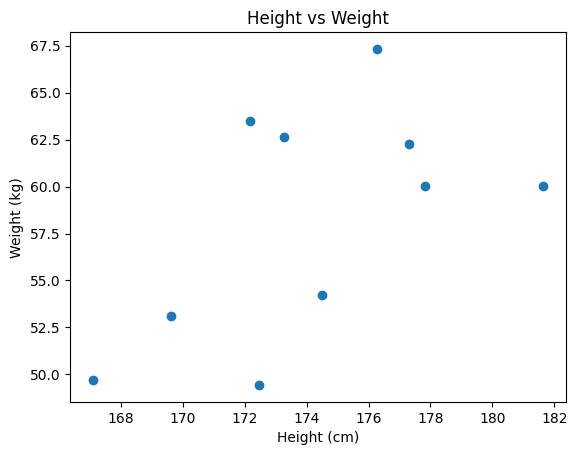

In [ ]:
plt.scatter(heights, weights)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')
plt.show()

We set our ```model``` to be ```Scikit Learn```'s ```LinearRegression()```. We then fit (in loose language "train") our ```model``` on the ```heights``` and ```weights```. Finally, we can use ```.predict()``` on the ```heights``` to obtain our regression line (```predicted_weights```). Note that every X value has a corresponding Y value that lays on the regression line. This Y value would be the prediction for unseen X values.

In [ ]:
heights = heights.reshape(-1,1)

# Create and fit the model:
model = LinearRegression()
model.fit(heights, weights)

# Predict weights using the model:
predicted_weights = model.predict(heights)

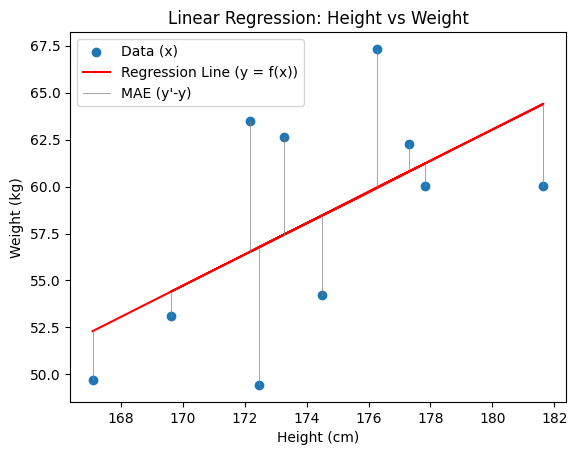

In [ ]:
plt.scatter(heights, weights, label='Data (x)')
plt.plot(heights, predicted_weights, color='red', label='Regression Line (y = f(x))')

for i, (x, y, y_hat) in enumerate(zip(heights, weights, predicted_weights)):
    label = 'MAE (y\'-y)' if i == 0 else None
    plt.plot([x, x], [y, y_hat], color='gray', label=label, linewidth=0.5)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Linear Regression: Height vs Weight')
plt.legend()
plt.show()


In [ ]:
print("Slope:    ", model.coef_[0])
print("Intercept:", model.intercept_)
print("MAE:      ", mean_absolute_error(weights, predicted_weights))

Slope:     0.8316246941984738
Intercept: -86.65482259856391
MAE:       4.2013993311276945


In [ ]:
h = 175
print(f"Predicted weight for height = {h}: ", model.predict([[h]]))

Predicted weight for height = 175:  [58.87949889]


# 2. Decision trees

We are once again working with a CSV file that can be found at the following link: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset. The file contains medical data that can be used as a predictor for diabetes. We will once again load the CSV file using ```Pandas```.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Python for clinicians/notebooks/diabetes_binary_5050split_health_indicators_BRFSS2015.csv") # REMEMBER: change the path, i.e. what's inside the quotation marks.

In [ ]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


For exapliary purposes, we will oversimplify the dataset and use only high blood pressure and high colesterol as preictors for diabetes.

In [ ]:
columns_of_interest = ["HighBP", "HighChol", "Diabetes_binary"]

In [ ]:
df = df[columns_of_interest]

In [ ]:
df

,HighBP,HighChol,Diabetes_binary
0,1.0,0.0,0.0
1,1.0,1.0,0.0
2,0.0,0.0,0.0
3,1.0,1.0,0.0
4,0.0,0.0,0.0
...,...,...,...
70687,0.0,1.0,1.0
70688,0.0,1.0,1.0
70689,1.0,1.0,1.0
70690,1.0,1.0,1.0


In [ ]:
data = df.to_numpy()

In [ ]:
data.shape

(70692, 3)

In [ ]:
data = data[34296:36396, :]

We can see the data consists of 70,692 patients. We select only 2,100 - 1,050 pisitive and 1,050 negative. This ensures a balanced dataset. Note, however, that more often than not data scientists deal with unbalanced datasets.

In [ ]:
data.shape

(2100, 3)

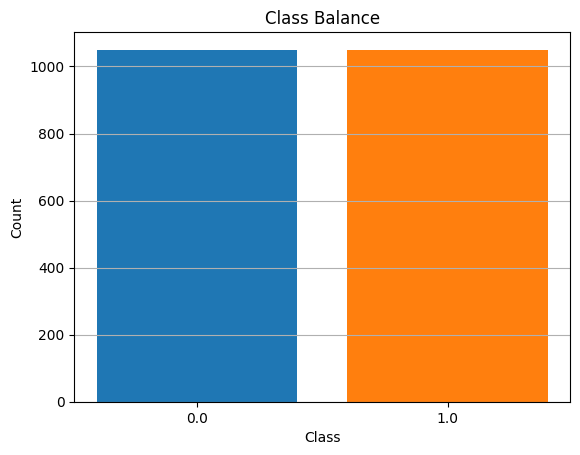

In [ ]:
# Count each class
classes, counts = np.unique(data[:, 2], return_counts=True)

# Bar plot
colors = ['C0' if cls == 0 else 'C1' for cls in classes]

plt.bar(classes, counts, color=colors, tick_label=classes)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Balance')
plt.grid(axis='y')
plt.show()

Randomly shuffle the data samples.

In [ ]:
data = np.random.permutation(data)

Create a train and test split.

In [ ]:
X_train, y_train = data[0:1750, :2], data[0:1750, 2]
X_test, y_test   = data[1750:2000, :2], data[1750:2000, 2]

We set our ```model``` to be ```Scikit Learn```'s ```DecisionTreeClassifier()```. We then fit (in loose language "train") our ```model``` on the ```X_train``` and ```y_train```. We can use ```.predict()``` on the ```X_test``` to predict the labels (```y_pred```). Note that the model assigns a label to each sample in ```X_test``` array. Finally, we calculate the ```model```'s accuracy by passing the true (```y_test```) and predicted (```y_pred```) labels to the ```accuracy_score()``` function.

In [ ]:
# Create and train the model
model = DecisionTreeClassifier()  # Use DecisionTreeRegressor() if it's a regression task
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.728


[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\ngini = 0.5\nsamples = 1750\nvalue = [881, 869]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\ngini = 0.38\nsamples = 788\nvalue = [587, 201]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.278\nsamples = 521\nvalue = [434, 87]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.489\nsamples = 267\nvalue = [153, 114]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\ngini = 0.424\nsamples = 962\nvalue = [294, 668]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.478\nsamples = 321\nvalue = [127, 194]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.385\nsamples = 641\nvalue = [167, 474]')]

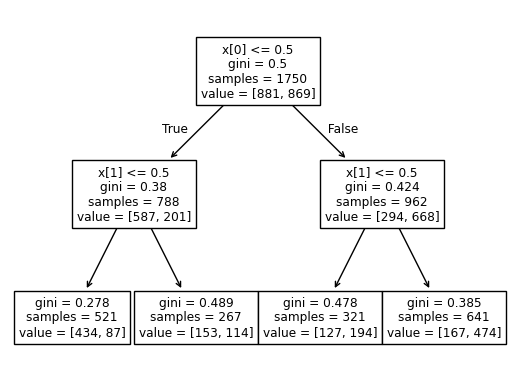

In [ ]:
tree.plot_tree(model)

# Implementing XOR using a Decission Tree (example from the slides).

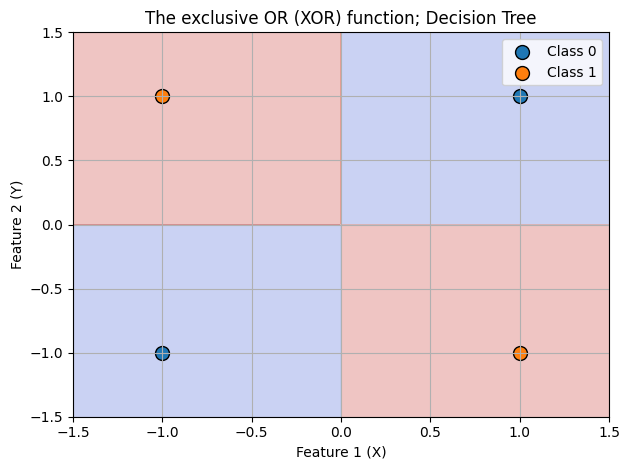

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Centered XOR data: inputs (X) and labels (y)
X = np.array([
    [-1, -1],
    [-1,  1],
    [ 1, -1],
    [ 1,  1]
])

y = np.array([0, 1, 1, 0])  # XOR: output is 1 if inputs are different

# Train decision tree
clf = DecisionTreeClassifier()
clf.fit(X, y)

# (Grid creation still okay if needed later)
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 300), np.linspace(-1.5, 1.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot original XOR data points
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='C0', label='Class 0', s=100, edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='C1', label='Class 1', s=100, edgecolor='k')

# Set axis range and ticks
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(np.arange(-1.5, 2.0, 0.5))
plt.yticks(np.arange(-1.5, 2.0, 0.5))

# Labels and legend
plt.xlabel('Feature 1 (X)')
plt.ylabel('Feature 2 (Y)')
plt.title('The exclusive OR (XOR) function; Decision Tree')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[Text(0.5, 0.8333333333333334, 'x[0] <= 0.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.25, 0.5, 'x[1] <= 0.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[1] <= 0.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

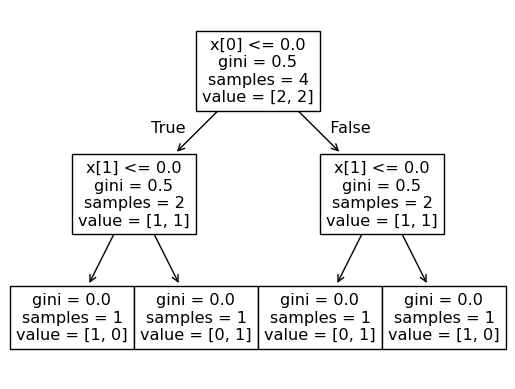

In [ ]:
tree.plot_tree(clf)